In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import scipy.stats as stats
%matplotlib inline

In [2]:
winners_df = pd.read_excel('winners.xlsx')
winner_ids = list(winners_df['Winners'])
num_winners = len(winner_ids)

df = pd.read_excel('crafting.xlsx')
unique_participants = df['ID'].unique()
num_participants = unique_participants.shape[0]

num_participants, num_winners

(259, 44)

In [3]:
#nan_participants 
df = df.dropna()
unique_participants = df['ID'].unique()
num_participants = unique_participants.shape[0]
num_participants

201

In [4]:
day1_crafters = df[df['Day'] == 1]['ID'].unique().shape[0]
day2_crafters = df[df['Day'] == 2]['ID'].unique().shape[0]
day3_crafters = df[df['Day'] == 3]['ID'].unique().shape[0]

day1_crafters, day2_crafters, day3_crafters

(179, 72, 55)

In [5]:
# Let's find the losers 11/55
losers = set(df[df['Day'] == 3]['ID'].unique()) - set(winner_ids)
losers_df = df[df['ID'].isin(losers)]
winners_df = df[df['ID'].isin(winner_ids)]

num_winners = len(winner_ids)
num_losers = len(losers)

num_winners, num_losers

(44, 13)

In [6]:
completed_ids = list(losers) + winner_ids
len(completed_ids)

57

In [7]:
level4_weapons = ['weapon2,weapon2', 'weapon3,weapon1', 'weapon1,weapon3']
level4_foods = ['food3,food1', 'food1,food3', 'food2,food2']

In [8]:
single_primitives = df[df['Inputs'].isin(['food1','food2','food3','food4','weapon1','weapon2','weapon3','weapon4'])]

In [9]:
df[df['Inputs'] == 'food1,food1,food1'].shape

(658, 6)

In [10]:
rows_list = []

for user_id in completed_ids:
    user_data = df[df['ID'] == user_id]
    
    # First attempt
    first_attempt = user_data.iloc[0,4]
    
    # Second attempt
    second_attempt = user_data.iloc[1,4]
    
    # Group
    user_group = user_data['Group'].unique()[0]
    
    # Total Attempts
    user_total_attempts = user_data.shape[0]
    
    # Day 1 Attempts 
    user_attempts1 = user_data[user_data['Day']==1].shape[0]

    # Day 2 Attempts
    user_attempts2 = user_data[user_data['Day']==2].shape[0]

    # Day 3 Attempts
    user_attempts3 = user_data[user_data['Day']==3].shape[0]

    # Weapon 4 Crafted
    num_weapon4 = user_data[user_data['Inputs'].isin(level4_weapons)].shape[0]
    
    # Food 4 Crafted
    num_food4 = user_data[user_data['Inputs'].isin(level4_foods)].shape[0]
        
    # Winner or Loser
    if user_id in winner_ids:
        winner = 1
    else:
        winner = 0

    user_dict = {'ID': user_id, 'Group':user_group, 'Attempts':user_total_attempts, 
                 'Day1 Attempts': user_attempts1, 'Day2 Attempts': user_attempts2,
                 'Day3 Attempts': user_attempts3, 'Win':winner,
                 'Weapon4 Crafted':num_weapon4, 'Food4 Crafted':num_food4,
                 'First Attempt':first_attempt, 'Second Attempt':second_attempt}

    rows_list.append(user_dict)
    
    
users_df = pd.DataFrame(rows_list)
## Graph correlation !!!

first_attempts = users_df['First Attempt'].value_counts()
second_attempts = users_df['Second Attempt'].value_counts()

features=['Group', 'Attempts', 'Day1 Attempts', 'Day2 Attempts', 'Day3 Attempts', 'Weapon4 Crafted', 'Food4 Crafted', 'Win']
users_df[features].corr()

,Group,Attempts,Day1 Attempts,Day2 Attempts,Day3 Attempts,Weapon4 Crafted,Food4 Crafted,Win
Group,1.000000,0.167356,0.135567,0.024673,0.158063,0.134909,-0.085217,0.032281
Attempts,0.167356,1.000000,0.534191,0.541275,0.854450,0.639330,0.467692,0.371634
Day1 Attempts,0.135567,0.534191,1.000000,0.116994,0.228202,0.262221,0.357887,0.250295
Day2 Attempts,0.024673,0.541275,0.116994,1.000000,0.155356,0.078000,0.510514,0.202375
Day3 Attempts,0.158063,0.854450,0.228202,0.155356,1.000000,0.727840,0.210922,0.293559
Weapon4 Crafted,0.134909,0.639330,0.262221,0.078000,0.727840,1.000000,0.295073,0.168908
Food4 Crafted,-0.085217,0.467692,0.357887,0.510514,0.210922,0.295073,1.000000,0.118191
Win,0.032281,0.371634,0.250295,0.202375,0.293559,0.168908,0.118191,1.000000


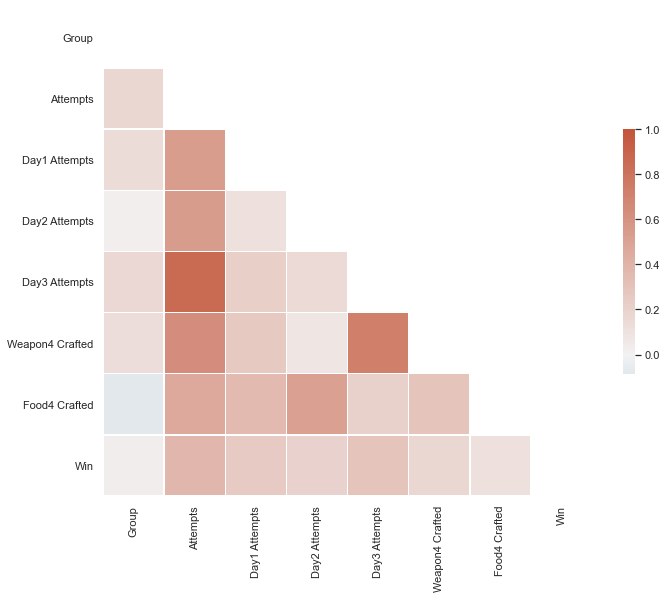

In [32]:
sns.set_theme(style="white")
features=['Group', 'Attempts', 'Day1 Attempts', 'Day2 Attempts', 'Day3 Attempts', 'Weapon4 Crafted', 'Food4 Crafted', 'Win']
corr = users_df[features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('cor_heatmap', bbox_inches='tight')

In [51]:
winner_attempts = users_df[users_df['Win'] == 1]['Attempts'].values
loser_attempts = users_df[users_df['Win'] == 0]['Attempts'].values

stats.ttest_1samp(loser_attempts, np.mean(winner_attempts))

Ttest_1sampResult(statistic=-4.269842878255011, pvalue=0.0010883891808608204)

ValueError: setting an array element with a sequence.

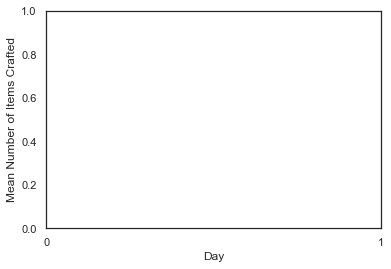

In [36]:
### Crafting Attempts
winner_mean_attempts1 = users_df[users_df['Win'] == 1]['Day1 Attempts'].mean()
loser_mean_attempts1 =  users_df[users_df['Win'] == 0]['Day1 Attempts'].mean()

winner_mean_attempts2 = users_df[users_df['Win'] == 1]['Day2 Attempts'].mean()
loser_mean_attempts2 =  users_df[users_df['Win'] == 0]['Day2 Attempts'].mean()

winner_mean_attempts3 = users_df[users_df['Win'] == 1]['Day3 Attempts']
loser_mean_attempts3 =  users_df[users_df['Win'] == 0]['Day3 Attempts']

plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Day")
plt.ylabel("Mean Number of Items Crafted")

plt.plot([1,2,3], [winner_mean_attempts1, winner_mean_attempts2, winner_mean_attempts3], 'rs-', color="green", markersize=8, label='Winners')
plt.plot([1,2,3], [loser_mean_attempts1, loser_mean_attempts2, loser_mean_attempts3], 'rs-', color="red", markersize=8, label='Losers')
plt.legend()
plt.savefig('winners_losers_craft', bbox_inches='tight')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


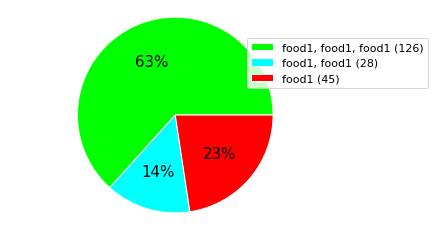

In [13]:
fig, ax = plt.subplots()
color_palette_list = ['#00ff00', '#00ffff','#ff0000']
plt.rcParams['font.sans-serif'] = 'monospace'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=15

labels = ['food1, food1, food1 (126)', 
         'food1, food1 (28)', 
         'food1 (45)' ]

percentages = [126/199, 28/199, 45/199]
ax.pie(percentages,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.6,labeldistance=1)
ax.axis('equal')
ax.legend(frameon=True, bbox_to_anchor=(0.7,0.6), labels=labels)
plt.savefig('first_attempt', bbox_inches='tight')

In [14]:
# drop attempts like food3,food3,food3 where sum exceeds possible levels
# drop attempts like food1, weapon2 where item types do not match

good_inputs = ['food1,food1',
              'food1,food1,food1',
              'food1,food2',
              'food2,food1',
              'food2,food2',
              'food1,food3',
              'food3,food1',
              'food1,food2,food1',
              'food2,food1,food1',
              'food1,food1,food2',
              'weapon1,weapon1',
              'weapon1,weapon2',
              'weapon2,weapon1',
              'weapon2,weapon2',
              'weapon1,weapon3',
              'weapon3,weapon1',
              'weapon1,weapon1,weapon1',
              'weapon1,weapon2,weapon1',
              'weapon2,weapon1,weapon1',
              'weapon1,weapon1,weapon2']

strict_inputs = ['food1,food1',
              'food1,food1,food1',
              'food2,food2',
              'weapon1,weapon1',
              'weapon2,weapon2',
              'weapon1,weapon1,weapon1']

flexible_inputs = ['food1,food2',
              'food2,food1',
              'food1,food3',
              'food3,food1',
              'food1,food2,food1',
              'food2,food1,food1',
              'food1,food1,food2',
              'weapon1,weapon2',
              'weapon2,weapon1',
              'weapon1,weapon3',
              'weapon3,weapon1',
              'weapon1,weapon2,weapon1',
              'weapon2,weapon1,weapon1',
              'weapon1,weapon1,weapon2']


df = df[df.Inputs.isin(good_inputs)] 

### Hypothesis 1:  Exposure to a strict system before a flexible system will cause participants to be more conservative when learning the new system. This is because they learn the concept that "levels must always match'', and they try to apply it to unseen objects.

* conservativeness = #strict / #inputs
* Compute conservativeness for each participant. 
* Take average for each group. 

In [81]:
df_completed[df_completed['ID'] == completed_ids[33]]

,ID,Time,Group,Day,Inputs,Success
1022,128391,3/8/2021 @ 16:32,2,1,"food1,food1",1
1023,128391,3/8/2021 @ 16:32,2,1,"food1,food1,food1",1
1024,128391,3/8/2021 @ 16:32,2,1,"food1,food2",0
1025,128391,3/8/2021 @ 16:32,2,1,"food1,food1,food1",1
1027,128391,3/8/2021 @ 16:32,2,1,"food3,food1",0
1029,128391,3/8/2021 @ 16:32,2,1,"food1,food1",1
1031,128391,3/8/2021 @ 16:32,2,1,"food2,food2",1
1036,128391,3/8/2021 @ 16:33,2,1,"food3,food1",0
1049,128391,3/8/2021 @ 16:35,2,2,"food1,food1,food1",1
1051,128391,3/8/2021 @ 16:35,2,2,"food1,food1,food1",1


In [15]:
df_completed = df[df['ID'].isin(completed_ids)]

df_group1 = df_completed[df_completed['Group'] == 1]
df_group2 = df_completed[df_completed['Group'] == 2]
group1_ids = df_group1['ID'].unique()
group2_ids = df_group2['ID'].unique()

df_group1_train = df_group1[df_group1['Day'] != 3]
df_group1_test = df_group1[df_group1['Day'] == 3]
# remove food attempts from test set
df_group1_test = df_group1_test[~df_group1_test['Inputs'].str.contains('food')]

df_group2_train = df_group2[df_group2['Day'] != 3]
df_group2_test = df_group2[df_group2['Day'] == 3]
# remove food attempts from test set
df_group2_test = df_group2_test[~df_group2_test['Inputs'].str.contains('food')]

In [16]:
df_group1_train['Inputs'].value_counts()
df_group2_test['Inputs'].value_counts()

weapon1,weapon1,weapon1    189
weapon1,weapon1            151
weapon2,weapon2             40
weapon3,weapon1              9
weapon1,weapon3              1
Name: Inputs, dtype: int64

In [24]:
# TODO: compute conservativeness for group1_train, group2_test
conservative_train = []

for group1_id in group1_ids:
    # get train data
    conservativeness = 0
    data_id = df_group1_train[df_group1_train['ID'] == group1_id]
    strict_attempts = data_id[data_id['Inputs'].isin(strict_inputs)]
    flexible_attempts = data_id[data_id['Inputs'].isin(flexible_inputs)]
    if data_id.shape[0] > 0: 
        conservativeness = strict_attempts.shape[0] / data_id.shape[0]
    conservative_train.append(conservativeness)

conservative_test = []
for group2_id in group2_ids:
    # get test data
    conservativeness = 0
    data_id = df_group2_test[df_group2_test['ID'] == group2_id]
    strict_attempts = data_id[data_id['Inputs'].isin(strict_inputs)]
    flexible_attempts = data_id[data_id['Inputs'].isin(flexible_inputs)]
    if data_id.shape[0] > 0: 
        conservativeness = strict_attempts.shape[0] / data_id.shape[0]
    conservative_test.append(conservativeness)


np.mean(conservative_train), np.mean(conservative_test)

(0.8634484692560916, 0.938953081232493)

In [26]:
stats.ttest_1samp(conservative_test, np.mean(conservative_train))

Ttest_1sampResult(statistic=2.032890697232882, pvalue=0.0520037768189807)

### Hypothesis 2: Exposure to a flexible system before a strict system causes participants to make more mistakes.  This is because their concept definition does not involve an equality of levels.

* For each participant, compute #failure / # total attempts

In [28]:
#df_group2_train['Inputs'].value_counts() # learning strict 
#df_group1_test['Inputs'].value_counts() # learning strict, conditioned on flexible

df_group1_test.shape

(325, 6)

In [20]:
# TODO: compute fail ratio for group1_train, group2_test
fail_train = []

for group2_id in group2_ids:
    fail_ratio = 0
    data_id = df_group2_train[df_group2_train['ID'] == group2_id]
    num_fails = data_id[data_id['Success'] == 0].shape[0]
    if data_id.shape[0] > 0: 
        fail_ratio = num_fails / data_id.shape[0]
    fail_train.append(fail_ratio)

fail_test = []
for group1_id in group1_ids:
    fail_ratio = 0
    data_id = df_group1_test[df_group1_test['ID'] == group1_id]
    num_fails = data_id[data_id['Success'] == 0].shape[0]
    if data_id.shape[0] > 0:
        fail_ratio = num_fails / data_id.shape[0]
    fail_test.append(fail_ratio)

np.mean(fail_train), np.mean(fail_test)

(0.05493970315398887, 0.046364586168687924)

In [30]:
stats.ttest_1samp(fail_test, np.mean(fail_train))

Ttest_1sampResult(statistic=-0.5496334065256038, pvalue=0.5869284740975897)